# **COMP 2211 Exploring Artificial Intelligence** #
## Lab 9 Minimax and Alpha-Beta Pruning ##
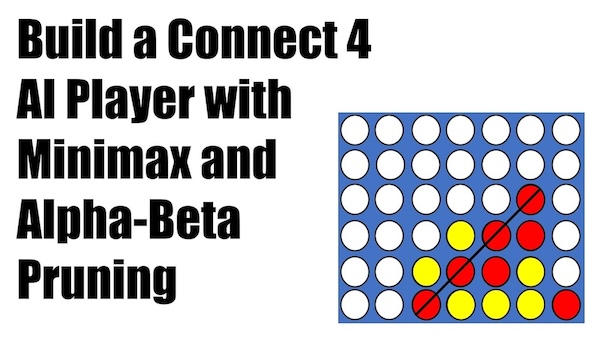

### 1. Game Introduction
🤖**Connect Four Game**🙋

There is a board with a 7x6 grid of possible positions. The board is arranged vertically: 7 columns, 6 cells per column, as follows:

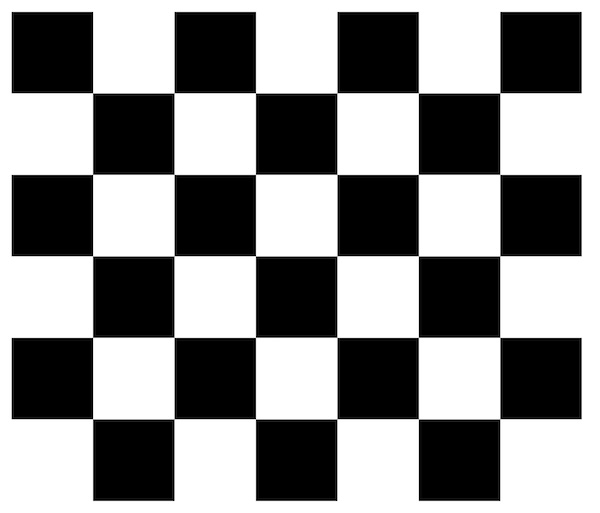

Two players take turns alternately adding discs to the board. Discs can be added to any column that is not full (i.e., does not already contain 6 discs). When a disc is added, it immediately falls to the lowest unoccupied cell in the column. 

The game is won by the first player to have four discs lined up in a row, either vertically: 

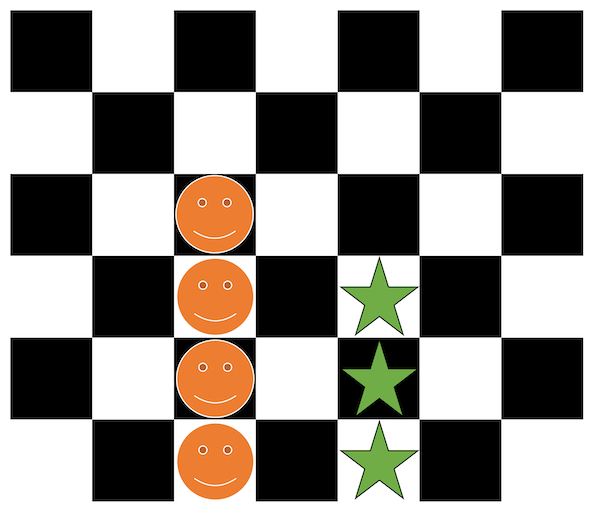

horizontally:

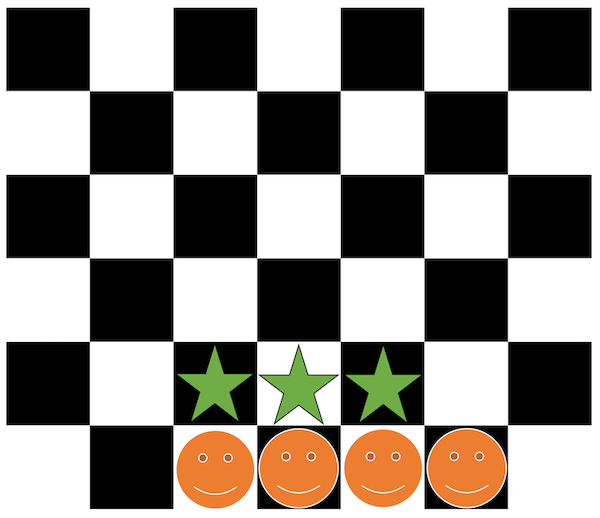

or along a diagonal:

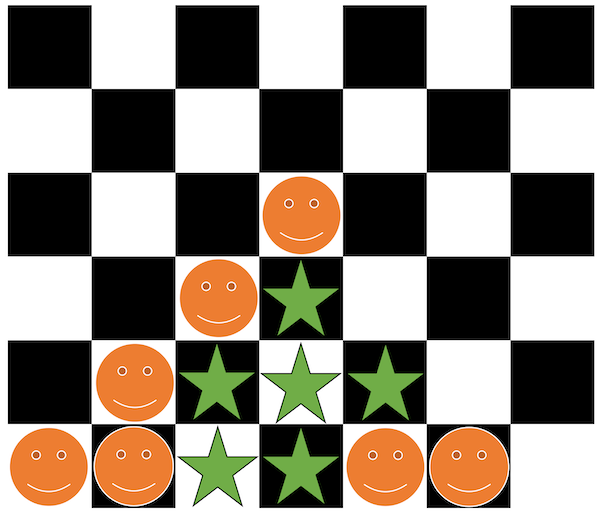

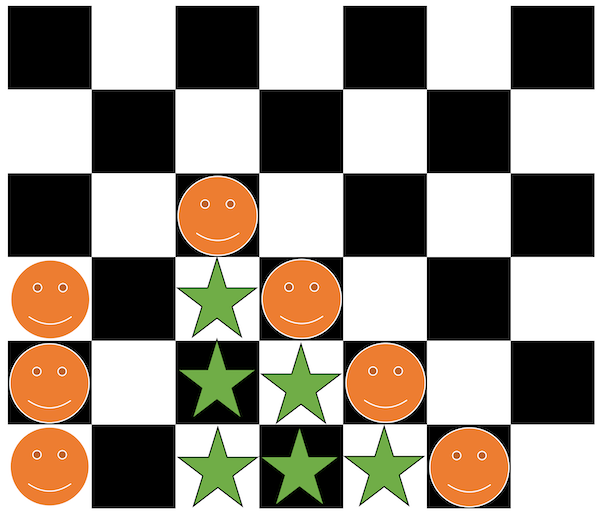

**Now, let's try to beat AI in this game! 🥳🥳🥳**

(To know this game better, you can try to play the Connect Four Game [online demo](https://www.mathsisfun.com/games/connect4.html).)

### 2. Minimax for Connect Four Game
In this section, you are going to complement the **Connect Four Game** design with a minimax algorithm.

**General Overview**
1. Board Initialization: Create an Empty Board
2. Game Play: AI or Human Drops a Disc on the Board
3. State Check If the Game Ends (One Player Wins or There's a Tie)
4. AI Decisions: AI Makes Decisions by Minimax Algorithm If It's AI's Turn

**Repeat Steps 1-4 Until Step 3 Finds Game Over.**

#### 2.1. Board Initialization and Visualization
**Functions Introduction**
```
board_initialize: initialize an empty board
print_board: print out the current board
```

In [ ]:
import numpy as np
""" Store a Connect-Four Board

A Connect-Four board is a matrix, laid out as follows:

      0 1 2 3 4 5 6
    0 * * * * * * *
    1 * * * * * * *
    2 * * * * * * *
    3 * * * * * * *
    4 * * * * * * *
    5 * * * * * * *

Board columns fill from the bottom (ie., row 6).
"""
# The horizontal width of the board
board_width = 7
# The vertical height of the board
board_height = 6
# The number of the Human-player and AI-player
EMPTY = 0
AI = 1
HUMAN = 2
# Count the number of nodes visited during the game search
COUNT = 0
# Map of board ID numbers to display characters used to print the board
board_symbol_mapping_ascii = { EMPTY: ' ',
                            HUMAN: 'X',
                            AI: 'O' }
      
def board_initialize(board_width, board_height): 
    """ Create a new ConnectFourBoard

    If board_array is specified, it should be an MxN matrix of iterable
    (ideally tuples or lists), that will be used to describe the initial
    board state.  Each cell should be either '0', meaning unoccupied, or
    N for some integer N corresponding to a player number.
    
    """
    board = np.zeros((board_height, board_width), dtype=int)
    return board
      
def print_board(board):
    for row in board:
        print("|", end="")
        for cell in row:
            print(f" {board_symbol_mapping_ascii[cell]} ", end="|")
        print()
    print("-" * (board.shape[1] * 4 + 1))
    print("  " + "   ".join(str(i) for i in range(board.shape[1])))
  

#### 2.2. Game Play: Drop a Disc
**Functions Introduction**
```
get_curr_row_by_col: get the position of the lowest unoccupied cell within the specific column
is_location_valid: check if the target column is still not full
drop_disc: add a disc to the target column on the board
```

In [ ]:
def get_curr_row_by_col(board,column):
    """ Get the current row by column
    """
    for row in range(board_height-1, -1, -1):
        if board[row][column] == 0:
            return row
    return None
    
def is_location_valid(board,column):
    """ Check if the location is valid
    """
    return board[0][column] == 0

def drop_disc(board,column, player_id):
    """ Drop a disc into the board at the specified column
    """
    row = get_curr_row_by_col(board,column)
    if is_location_valid(board,column) and row is not None:
        board[row][column] = player_id
    else:
        raise ValueError("Invalid Move: Column is full or out of bounds")

#### 2.3. Winning Condition Check
**Functions Introduction**
```
winning_move: check if player 1 or player 2 wins under the current board state
```

In [ ]:
def winning_move(board, player_id):
    # Check horizontal locations for win
    for c in range(board.shape[1]-3):
        for r in range(board.shape[0]):
            if board[r][c] == player_id and board[r][c+1] == player_id and board[r][c+2] == player_id and board[r][c+3] == player_id:
                return True

    # Check vertical locations for win
    for c in range(board.shape[1]):
        for r in range(board.shape[0]-3):
            if board[r][c] == player_id and board[r+1][c] == player_id and board[r+2][c] == player_id and board[r+3][c] == player_id:
                return True

    # Check positively sloped diagonals
    for c in range(board.shape[1]-3):
        for r in range(board.shape[0]-3):
            if board[r][c] == player_id and board[r+1][c+1] == player_id and board[r+2][c+2] == player_id and board[r+3][c+3] == player_id:
                return True

    # Check negatively sloped diagonals
    for c in range(board.shape[1]-3):
        for r in range(3, board.shape[0]):
            if board[r][c] == player_id and board[r-1][c+1] == player_id and board[r-2][c+2] == player_id and board[r-3][c+3] == player_id:
                return True
    return False

#### 2.4. AI Decisions Making (Minimax) (Lab Task Section)
##### 2.4.1. Nodes Scoring (Task 1)
**TODO:** Write the `evaluate_position` function to give a score to each state node according to the current board composition.

**Note:** Vectorization is **not** required, i.e. you can use any amount of for loops. Feel free to do so for a challenge (and ensure the implementation is correct).

**Exact Criteria:** for each four consecutive cells (horizontal or vertical or diagonal)
* Point value is positive if it favors the AI, and negative if it favors its opponent.
* If it contains at least one disc of each player, it cannot be used to win. It is worth 0.
* If it contains 4 discs of the same player, it is worth ±∞ (or you can set a large enough integar value) since one player has won.
* If it contains 3 discs of the same player (and 1 empty) it is worth ±100.
* If it contains 2 discs of the same player (and 2 empties) it is worth ±10.
* If it contains 1 disc (and 3 empties) it is worth ±1.


In [ ]:
def evaluate_position(board,player):
    """An evaluation function that assigns a score to the board state
    by adding the possible score for all directions.
    Returns the score."""
    ########### TODO: Your code here ###########
    
    
    ########### End of your code ###########
    return score

##### 2.4.2. Minimax for AI turn (Task 2)
**TODO:** Write the `minimax` function to make an AI decision by Minimax algorithm.

**Note:** 
1. Vectorization is **not** required. 
2. And the heuristic function should return the score of the final node by your self-completed 'evaluate_position' function as in section 2.4.1 whenever the depth reaches 0 or the game ends as TODO-1 task below. 
3. For you better understanding, the depth of the heuristic fuction is often set as 4 (to balance the trade-off between algorithm accuracy and efficiency), which you can also see in the latter debugging space section.

**Hints:** Try to do it in a recursive way.

**Function Introduction**
```
get_valid_columns: return the non-empty columns in the current board
is_full: check if all columns are full, meaning it's a tie
is_terminal_node: check if the game ends (anyone wins or ties)
```
**Return Values**
```
column: (int) the column index of the next choice of AI.
value: (int) the score of node that will be choosed by AI for next turn.
```

In [ ]:
import math

def get_valid_columns(board):
    return [c for c in range(board.shape[1]) if is_location_valid(board,c)]

def is_full(board):
    return all(cell != 0 for row in board for cell in row)

def is_terminal_node(board):
    return winning_move(board, HUMAN) or winning_move(board, AI) or len(get_valid_columns(board)) == 0

def minimax(board, depth, do_max, player):
    global COUNT
    COUNT += 1
    
    opponent = HUMAN if player == AI else AI
    valid_columns = get_valid_columns(board)
    is_terminal = is_terminal_node(board)
    if depth == 0 or is_terminal:
    ### [TODO-1]
        '''
        If the depth is 0 (depth limit has been reached) or
        the node is terminal (indicating a win, lose, or tie state),
        the function returns the (heuristic) value of the node returned by `evaluate_position`.
        '''
        ########### TODO-1: Your code here ###########
        
        
        ########### End of your code ###########
        return column, value
    
    else:
        value = -math.inf if do_max else math.inf
        column = valid_columns[0]
        
        ### [TODO-2]
        '''
        Minimax is a recursive function that explores the game tree to find the best move.
        It alternates between maximizing and minimizing the score based on the current player.
        Here, if 'do_max' is True, function 'minimax' should do maximizing, otherwise it should do minimizing.
        And 'player' refers to the current player that will drop a disc this turn and be evaluated by 'minimax'.
        '''
        ########### TODO-2: Your code here ###########


        ######### End of your code ###########
        return column, value

##### 2.4.3. Minimax with Alpha-beta Pruning for AI Turn (Task 3)
**TODO:** Write the `alpha_beta_pruning` function to make AI decisions by Minimax with Alpha-Beta Pruning.

**Note:** 
1. Alpha-Beta pruning does **not** change AI's decision but reduces the number of nodes visited during searching. 
2. Vectorization is **not** required (same as Task 2).
3. And the heuristic function should return the score of the final node by your self-completed 'evaluate_position' function as in section 2.4.1 whenever the depth reaches 0 or the game ends as TODO-1 task below(same as Task 2). 
4. For you better understanding, the depth of the heuristic fuction is often set as 4 (to balance the trade-off between algorithm accuracy and efficiency), which you can also see in the latter debugging space section(same as Task 2).

**Return Values**
```
column: (int) the column index of the next choice of AI.
value: (int) the score of node that will be choosed by AI for next turn.
```

In [ ]:
def alpha_beta_pruning(board, depth, alpha, beta, do_max, player):
    global COUNT
    COUNT += 1
    
    opponent = HUMAN if player == AI else AI
    valid_columns = get_valid_columns(board)
    is_terminal = is_terminal_node(board)
    if depth == 0 or is_terminal:
        ### [TODO-1]
        '''
        If the depth is 0 (depth limit has been reached) or
        the node is terminal (indicating a win, lose, or tie state),
        the function returns the (heuristic) value of the node returned by `evaluate_position`.
        '''
        ########### TODO-1: Your code here ###########
        
        
        ########### End of your code ###########
        return column, value
    else:
        value = -math.inf if do_max else math.inf
        column = valid_columns[0]
        
        ### [TODO-2]
        '''
        You need to implement the alpha-beta pruning algorithm here.
        The function should return the column index and the score.
        The alpha and beta values are used to prune branches that won't be chosen.
        Here, 'do_max' decides wether updating alpha value or beta value.
        And 'player' refers to the current player that will drop a disc this turn and be evaluated by 'alpha_beta_pruning'.
        '''
        ########### Your code here ###########


        ######### End of your code ###########
        return column, value

##### 2.4.4. Nodes Pruning Check (Alpha-Beta Pruning vs Vanilla Minimax) (Task 4)
**TODO:** write the `game_check` function to complete a game simulation between AI and human players.

**Note:** 
1. Vectorization is **not** required (same as Task 2 & 3).
2. Here we predefine a list `test_human_array` as a simulation for human moves, you can also modify this list for your reference.
3. After completing this section, you can check if your alpha-beta pruning works compared with vanilla minimax (same decision with less nodes accessed).

**Return Value**
```
winner: (int) winner of this game simulation, 0 means a tie or running out of your input human moves, 1 means AI wins and 2 means Human wins.
```

**Print Value**
```
COUNT: (int) a global value increasing increamentally when a new node is accessed by minimax or alpha-beta pruning and it should be initialized to zero each time you run 'game_check'.
```


(Vanilla Minimax refers to the original Minimax algorithm without alpha-beta pruning.)

In [ ]:
def game_check(test_human,first_player,do_pruning):
    winner = 0
    board = board_initialize(board_width, board_height)
    print("{} goes first.".format(board_symbol_mapping_ascii[first_player]))
    human_count = 0
    while True:
        if human_count >= len(test_human):
            print("No more human moves left.")
            break
        if first_player == AI:
            # AI's turn
            print("AI's turn")
            
            ### [TODO-1]
            '''
            1. AI's turn, apply minimax algorithm (or with alpha-beta pruning) to decide next move;
            2. Drop corresponding disc into the chosen column;
            3. Winning check.
            '''
            ########### Your code here ###########


            ######### End of your code ###########
            first_player = HUMAN # Player Switch
            
        else:
            # Human's turn
            print("Human's turn.")
                        
            ### [TODO-2]
            '''
            1. Human's turn, successively load human move from the pre-defined test list (array);
            2. Slide to next human move when encountering an invalid move;
            2. Drop corresponding disc into the chosen column;
            3. Winning check.
            '''
            ########### Your code here ###########


            ######### End of your code ###########
            first_player = AI # Player Switch
        
        if is_full(board):
            print("It's a tie!")
            break
        
        return winner

    print("Total nodes accessed by {}:".format("Alpha-Beta Pruning" if do_pruning else "Vanilla Minimax"), COUNT)

##### 2.4.5. Game Against Your AI (Optional Task, Ungraded)
**Note: This section will not be graded, feel free to do this part if you want to play against your AI model. The code is very similar as section 2.4.4.**

**TODO (optional):** Write the `play_against_ai` function to complete a interactive game against your AI model.

**🔥Have Fun!🔥**

In [ ]:
def play_against_ai(do_pruning):
    board = board_initialize(board_width, board_height)
    print("Please choose who goes first: 1 for AI, 2 for You")
    first_player = int(input("Enter your choice: "))
    while True:
        if first_player == AI:
            # AI's turn
            print("AI's turn")
            
            ### [TODO-1](optional)
            '''
            This part is the same as the game_check function.
            '''
            ########### Your code here ###########


            ######### End of your code ###########
            first_player = HUMAN # Player Switch
            
        else:
            # Human's turn
            print("Your turn.")
            
            ### [TODO-2](optional)
            '''
            This part is similar to the game_check function.
            The only difference is that the human player can choose the column to drop the disc.
            And an example to input human move is shown below.
            '''
            col = int(input("Your choice (0-6): ")) # for your reference to take your type-in number as human move in your turn
            
            ########### Your code here ###########

            
            ######### End of your code ###########
            first_player = AI # Player Switch
            
        if is_full(board):
            print("It's a tie!")
            break
        
    print("Total nodes accessed:", COUNT)

### 3. Debugging Space

In [ ]:
if __name__ == "__main__":
    # Your code that will not be run on ZINC.
    ## Examples:
    ### Check your board state (Section 2.1)
    board = board_initialize(board_width, board_height)
    print_board(board)
    ### Drop a disc and check board sate (Section 2.2)
    drop_disc(board,3, 1)
    print_board(board)
    ### Check winning move (Section 2.3)
    print_board(board)
    print(winning_move(board, 1))  # Should return False
    array_win = np.array([[0,0,0,0,0,0,0],
                        [0,0,0,0,0,0,0],
                        [0,0,0,0,0,0,0],
                        [0,0,0,0,0,0,0],
                        [0,0,2,2,2,0,0],
                        [0,0,1,1,1,1,0]])
    print_board(array_win)
    print(winning_move(array_win, 1))  # Should return True
    ### Check your nodes scoring function for TODO 1 (Section 2.4.1)
    drop_disc(board, 2, 2)
    print_board(board)
    print("{}:".format(board_symbol_mapping_ascii[1]),evaluate_position(board, 1))  # Should return a score based on the current board state
    print("{}:".format(board_symbol_mapping_ascii[2]),evaluate_position(board, 2))  # Should return a score based on the current board state
    drop_disc(board, 4, 1)
    print_board(board)
    print("{}:".format(board_symbol_mapping_ascii[1]),evaluate_position(board, 1))  # Should return a score based on the current board state
    print("{}:".format(board_symbol_mapping_ascii[2]),evaluate_position(board, 2))  # Should return a score based on the current board state
    drop_disc(board, 2, 2)
    print_board(board)
    print("{}:".format(board_symbol_mapping_ascii[1]),evaluate_position(board, 1))  # Should return a score based on the current board state
    print("{}:".format(board_symbol_mapping_ascii[2]),evaluate_position(board, 2))  # Should return a score based on the current board state
    ### Check your minimax function for TODO 2 (Section 2.4.2)
    print_board(board)
    ai_choice,score = minimax(board, 4, True, 1) # Search Depth is set to be 4
    print(f"AI chooses column {ai_choice} with score {score}")
    drop_disc(board, ai_choice, 1)
    print_board(board)
    ### Check your alpha-beta pruning function for TODO 3 (Section 2.4.3)
    array_from_4_2 = np.array([
        [0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0],
        [0,0,2,0,0,0,0],
        [0,0,2,1,1,0,0]
    ])
    print_board(array_from_4_2)
    ai_choice,score = alpha_beta_pruning(array_from_4_2, 4, -math.inf, math.inf, True, 1) # Search Depth is set to be 4
    print(f"AI chooses column {ai_choice} with score {score}")
    drop_disc(array_from_4_2, ai_choice, 1)
    print_board(array_from_4_2) ### You should get the same answer as in Section 2.4.2
    ### Check if your alpha-beta pruning function is faster than the minimax function (Section 2.4.4)
    test_human_array = [0,1,2,3,4,5,6,0,1,2,3,4,5,6,0,1,2,3,4,5,6] ### You can also customize this array for your reference
    COUNT = 0
    winner = game_check(test_human_array, 1, False)
    COUNT = 0
    winner = game_check(test_human_array, 1, True)
    ### Play the game against your AI and try to defeat it :) (Section 2.4.5)
    COUNT = 0
    play_against_ai(do_pruning=False) # Or you can set it to be True to use alpha-beta pruning

### 4. Grading Scheme
1. If you pass the test for Task 1, you get 3 out of 12 points (graded with monkey patch, so your other tasks do not affect it).
2. If you pass the test for Task 2, you get 3 out of 12 points (no monkey patch here, make sure your Task 1 is correct).
3. If you pass the test for Task 3 (both accuracy and efficiency), you get 3 out of 12 points (no monkey patch here, make sure your Task 1 is correct).
4. If you pass the test for Task 4, you get 3 out of 12 points (no monkey patch here, make sure you Task 1,2,3 are correct).